In [33]:
import pygithub3
from collections import defaultdict
import requests
from pygithub3 import Github
import os, sys
import json
from requests.exceptions import ConnectionError
import time
import datetime
import dateutil.parser
import pickle

import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
get_ipython().magic(u'matplotlib inline')

In [4]:
lookuptable=defaultdict(lambda : defaultdict(int))

In [8]:
with open('data_combined.txt') as f:
    lines = f.readlines()
    for line in lines[1:]:
        item = line.split("\t")
        lookuptable[item[0]]["github_owner"]=item[1]
        lookuptable[item[0]]["github_name"]=item[2]
        lookuptable[item[0]]["github_addr"]="https://api.github.com/repos/"+item[1]+"/"+item[2]+"/commits"

In [10]:
type(lookuptable)

collections.defaultdict

In [11]:
with open("existed_path.txt") as f:
    existed_paths=f.readlines()
    existed_paths=[s.strip() for s in existed_paths]

In [12]:
len(existed_paths)

10520

In [15]:
for path in existed_paths:
    try:
        with open(path+"/1.txt") as f:
            line=f.readlines()[0]
            last=json.loads(line)[0]["commit"]["author"]["date"]
            penultimate=json.loads(line)[1]["commit"]["author"]["date"]
            antepenultimate=json.loads(line)[2]["commit"]["author"]["date"]
            with open("commits_time_table.txt","a") as f2:
                f2.write(path+"\t"+last+"\t"+penultimate+"\t"+antepenultimate+"\n")
    except:
        print path

assets/seven1m/facebook_party
assets/xyuwang/Fetion
assets/shiro16/nagareboshi
assets/westoque/google_terminal
assets/xdothackerx/lister
assets/ePublishing/memoizable_method_missing
assets/yanoh/adlint-exam-c_staging
assets/poitch/sinatra-mapper
assets/flori/ctapi
assets/robotblake/adapter-leveldb
assets/c4mprod/rack-server-status
assets/nedzadarek/pry-exercismun
assets/amarshall/vlad-assets
assets/jmarhee/Simple-CloudFlare-Client
assets/sapronlee/bootstrap_rainbow
assets/fxhover/mini_xml
assets/rajeevkannav/serialized
assets/addagger/ui_helpers
assets/xixilive/midpay_alipay
assets/vfonic/view_generator
assets/benspotatoes/histrionic-superhero
assets/BendingSpoons/cocoapods-clean
assets/ericcf/rad_matchers
assets/trungkien1503/reredis
assets/firestarter87/simple-chmod
assets/sirljan/eXistAPI
assets/simonwhitaker/filecache-ruby
assets/chelovekov/fibre
assets/ShigekiDoumae/method_with_save
assets/dm1try/active_model-attributes_validation
assets/jjuliano/raptcache
assets/nicoschuele/qwikc

In [24]:
with open("commits_time_table.txt") as f:
    lines=f.readlines()
    lines=[s.strip() for s in lines]
    lines=[s[7:] for s in lines]
    looktime={s.split()[0]:[(dateutil.parser.parse(s.split()[1])).replace(tzinfo=None).date(),(dateutil.parser.parse(s.split()[2])).replace(tzinfo=None).date(),(dateutil.parser.parse(s.split()[3])).replace(tzinfo=None).date()] for s in lines}

In [26]:
anchor_date="2015-03-22"
anchor_date = datetime.datetime.strptime(anchor_date,'%Y-%m-%d').date()

In [47]:
time_interval={s:[(anchor_date-looktime[s][0]).days,(looktime[s][0]-looktime[s][1]).days,(looktime[s][1]-looktime[s][2]).days]for s in looktime}

In [48]:
pickle.dump(time_interval,open("commits_time_interval.p","wb"))

In [49]:
sns.set_palette("deep",desat=.6)
sns.set_context(rc={"figure.figsize":(8,4)})

In [50]:
anchor2last=[time_interval[s][0] for s in time_interval]

In [51]:
last2penil=[time_interval[s][1] for s in time_interval]

In [52]:
penil2antepenil=[time_interval[s][1] for s in time_interval]

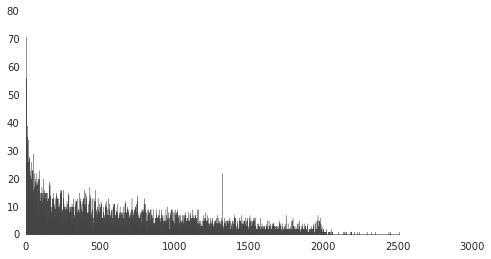

In [88]:
a2l_plot=plt.hist(anchor2last,10000, histtype="stepfilled",alpha=.7)

In [63]:
from scipy.stats import linregress

In [92]:
a2l_x=[np.mean([a2l_plot[1][i],a2l_plot[1][i+1]]) for i,s in enumerate(a2l_plot[1][:-1])]

In [91]:
a2l_y=a2l_plot[0]

In [106]:
liner_test_1=[]

In [107]:
for i in range(1,len(a2l_x)+1):
    liner_test_1.append(linregress(a2l_x[:i],a2l_y[:i])[2])

In [118]:
liner_test_1_index=[]
for item in sorted(liner_test_1[:100]):
    liner_test_1_index.append(liner_test_1.index(item))

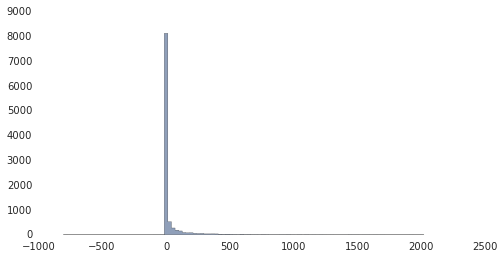

In [117]:
l2p_plot=plt.hist(last2penil,100, histtype="stepfilled",alpha=.7)

In [119]:
l2p_x=[np.mean([l2p_plot[1][i],l2p_plot[1][i+1]]) for i,s in enumerate(l2p_plot[1][:-1])]

In [120]:
l2p_y=l2p_plot[0]